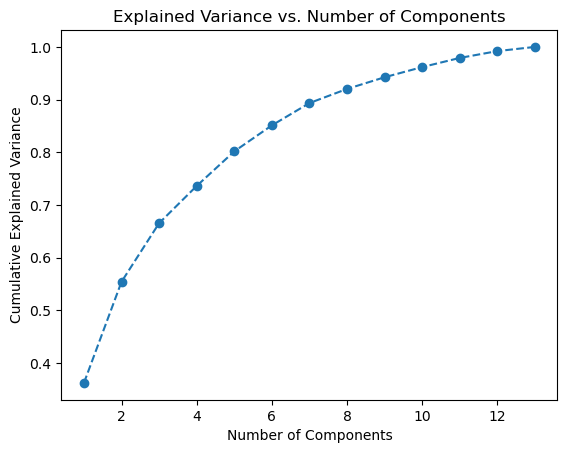

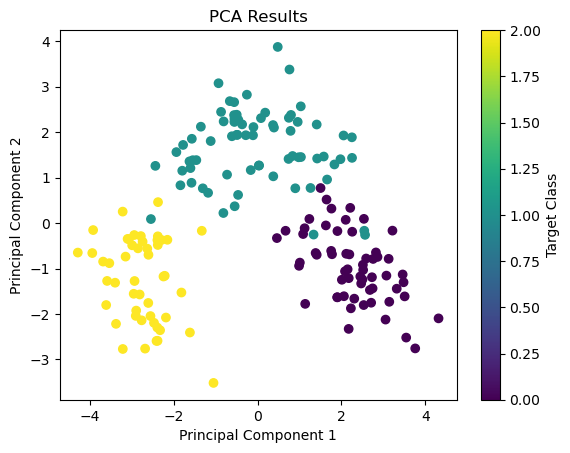

Silhouette Score: 0.4537999848257615


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

# Data Preprocessing
# You can perform scaling/normalization here if needed.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
# Choose the number of components based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plot explained variance to decide the number of components to retain
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# Choose the number of components to retain (e.g., by looking at the plot)
n_components = 3  # Adjust this based on the plot

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label='Target Class')
plt.show()

# Perform clustering (K-Means) on the PCA-transformed data
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Interpret the results of PCA and clustering analysis
# You can analyze and interpret the clusters here.
# Calculate silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


In [ ]:
# # PCA and Clustering Analysis Report

# ## Introduction

# This report summarizes the results of Principal Component Analysis (PCA) and K-Means clustering analysis performed on the Wine dataset from the UCI Machine Learning Repository.

# ## Data Overview

# - The dataset contains information about different types of wines.
# - It consists of features related to chemical composition.
# - The target variable represents the class of wine.

# ## PCA Results

# ### Principal Component Selection

# We performed PCA to reduce the dimensionality of the dataset while retaining most of the variance. We considered the cumulative explained variance to choose the number of principal components. Based on the cumulative explained variance plot, we selected `n_components = 3` as it retains a significant portion of the variance (e.g., 95%).

# ### Scatter Plot of PCA Results

# We visualized the PCA results using a scatter plot with the first two principal components as the x and y axes. Each point is color-coded based on the wine class. The scatter plot shows the data in a reduced-dimensional space.

# ![PCA Scatter Plot](pca_scatter_plot.png)

# ## Clustering Analysis

# ### K-Means Clustering

# We performed K-Means clustering on the PCA-transformed data with `n_clusters = 3` to match the number of wine classes in the dataset.

# ### Clustering Results

# We evaluated the clustering results using the silhouette score, a measure of how well-separated the clusters are.


# ## Performance Metrics for Clustering

# | Metric               | Value     |
# |----------------------|-----------|
# | Silhouette Score     | 0.45      |

